## Comparison of Dimensionality Reduction Techniques on the Enhanced Ads Dataset

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import time
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
adData = pd.read_csv('ad_data.csv', sep=',', header=None, error_bad_lines=False)
adData.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


The pd.read_csv() function's arguments are the filename as a string and the limit separator of a CSV file, which is ",". Please note that as there are no headers for the dataset. We specifically mention this using the header = None command. The last argument, **error_bad_lines=False**, is to skip any errors in the format of the file and then load data.

In [3]:
# dataset shape
print(adData.shape)

(3279, 1559)


In [4]:
# summarizing the statistics of the numerical raw data
adData.describe()

,4,5,6,7,8,9,10,11,12,13,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,0.004270,0.011589,0.004575,0.003355,0.003965,0.011589,0.003355,0.004880,0.009149,0.004575,...,0.006099,0.004575,0.003660,0.002440,0.003050,0.006404,0.012809,0.013419,0.009759,0.001525
std,0.065212,0.107042,0.067491,0.057831,0.062850,0.107042,0.057831,0.069694,0.095227,0.067491,...,0.077872,0.067491,0.060393,0.049341,0.055148,0.079783,0.112466,0.115077,0.098320,0.039026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we saw from the shape of the data, the dataset has 3279 examples with 1559 variables. The variable set has both categorical and numerical variables. The summary statistics are only derived for numerical data.

In [5]:
# separate dependent and independent variables
# preparing X variables
X = adData.loc[:,0:1557] # got the features from output above
print(X.shape)

# preparing y variable
y = adData[1558]
print(y.shape)

(3279, 1558)
(3279,)


In [6]:
# head of independent variables
X.head(15)

,0,1,2,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


From the output, we can see that there are many missing values in the dataset, which are represented by **?**. For further analysis, we have to remove these special characters and then replace those cells with assumed values. One popular method of replacing special characters is to impute the mean of the respective feature. Let's adopt this strategy. However, before doing that, let's look at the data types for this dataset to adopt a suitable replacement strategy.

In [7]:
# printing data types of dataset
print(X.dtypes)

0       object
1       object
2       object
3       object
4        int64
         ...  
1553     int64
1554     int64
1555     int64
1556     int64
1557     int64
Length: 1558, dtype: object


In [8]:
# replacing special characters with NaN values for the first 3 columns which are of type object
for i in range(0,3):
    X[i] = X[i].str.replace('?', 'nan').values.astype(float)
print(X.head(15))

     0      1       2    3     4     5     6     7     8     9     ...  1548  \
0   125.0  125.0  1.0000    1     0     0     0     0     0     0  ...     0   
1    57.0  468.0  8.2105    1     0     0     0     0     0     0  ...     0   
2    33.0  230.0  6.9696    1     0     0     0     0     0     0  ...     0   
3    60.0  468.0  7.8000    1     0     0     0     0     0     0  ...     0   
4    60.0  468.0  7.8000    1     0     0     0     0     0     0  ...     0   
5    60.0  468.0  7.8000    1     0     0     0     0     0     0  ...     0   
6    59.0  460.0  7.7966    1     0     0     0     0     0     0  ...     0   
7    60.0  234.0  3.9000    1     0     0     0     0     0     0  ...     0   
8    60.0  468.0  7.8000    1     0     0     0     0     0     0  ...     0   
9    60.0  468.0  7.8000    1     0     0     0     0     0     0  ...     0   
10    NaN    NaN     NaN    1     0     0     0     0     0     0  ...     0   
11   90.0   52.0  0.5777    1     0     

To replace the first three columns, we loop through the columns using the **for() loop** and also using the **range()** function. Since the first three columns are of the **object** or **string type**, we use the **.str.replace()** function, which stands for "string replace". After replacing the special characters, **?**, of the data with nan, we convert the data type to **float** with the **.values.astype(float)** function, which is required for further processing. By printing the first 15 examples, we can see that all special characters have been replaced with **nan** or **NaN** values

In [9]:
# replacing special characters in the remaining columns which are of type integer
for i in range(3, 1557):
    X[i] = X[i].replace('?', 'NaN').values.astype(float)

Now that we have replaced special characters in the data with NaN values, we can use the fillna() function in pandas to replace the NaN values with the mean of the column.

In [10]:
# impute the 'NaN' with the mean of the values
for i in range(0,1557):
    X[i] = X[i].fillna(X[i].mean())
print(X.head(15))

          0           1         2     3     4     5     6     7     8     \
0   125.000000  125.000000  1.000000   1.0   0.0   0.0   0.0   0.0   0.0   
1    57.000000  468.000000  8.210500   1.0   0.0   0.0   0.0   0.0   0.0   
2    33.000000  230.000000  6.969600   1.0   0.0   0.0   0.0   0.0   0.0   
3    60.000000  468.000000  7.800000   1.0   0.0   0.0   0.0   0.0   0.0   
4    60.000000  468.000000  7.800000   1.0   0.0   0.0   0.0   0.0   0.0   
5    60.000000  468.000000  7.800000   1.0   0.0   0.0   0.0   0.0   0.0   
6    59.000000  460.000000  7.796600   1.0   0.0   0.0   0.0   0.0   0.0   
7    60.000000  234.000000  3.900000   1.0   0.0   0.0   0.0   0.0   0.0   
8    60.000000  468.000000  7.800000   1.0   0.0   0.0   0.0   0.0   0.0   
9    60.000000  468.000000  7.800000   1.0   0.0   0.0   0.0   0.0   0.0   
10   64.021886  155.344828  3.911953   1.0   0.0   0.0   0.0   0.0   0.0   
11   90.000000   52.000000  0.577700   1.0   0.0   0.0   0.0   0.0   0.0   
12   90.0000

In [11]:
# scale data using MinMaxScaler; scaling data is useful in the modeling step
from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()

# transforming with the scaler function
X_tran = pd.DataFrame(minmaxScaler.fit_transform(X))
print(X_tran.head())

       0         1         2     3     4     5     6     7     8     9     \
0  0.194053  0.194053  0.016642   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.087637  0.730829  0.136820   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.050078  0.358372  0.116138   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.092332  0.730829  0.129978   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.092332  0.730829  0.129978   1.0   0.0   0.0   0.0   0.0   0.0   0.0   

   ...  1548  1549  1550  1551  1552  1553  1554  1555  1556  1557  
0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1558 columns]


In [12]:
# creating high dimensional dataset by factor 2
X_hd = pd.DataFrame(np.tile(X_tran, (1,2)))
X_hd.shape

(3279, 3116)

In [13]:
# create random samples from a normal distribution with mean=0 and standard-deviation=0.1
# Make the new dataset with the same shape as high dimensional dataframe created in the step above.

# defining the mean and standard deviation
mu, sigma = 0, 0.1

# generating random sample
noise = np.random.normal(mu, sigma, [3279,3116])
noise.shape

(3279, 3116)

In [14]:
# creating a new data set by adding sampled data frame
df_new = X_hd + noise
df_new

,0,1,2,3,4,5,6,7,8,9,...,3106,3107,3108,3109,3110,3111,3112,3113,3114,3115
0,0.097443,0.097004,0.061381,1.032264,0.153032,-0.027387,0.004877,-0.034711,0.103990,-0.004016,...,-0.058774,0.141078,0.207189,-0.070665,-0.003535,-0.034434,0.115862,0.007244,0.045630,0.106138
1,0.284384,0.814721,0.057676,0.943271,0.052904,0.014518,-0.019677,-0.016394,0.106286,0.066427,...,0.012483,-0.101304,-0.062535,0.013799,-0.162420,0.032368,0.065325,-0.094874,-0.078148,0.075703
2,0.194045,0.198971,0.248610,0.928179,-0.043900,-0.077631,-0.019840,-0.043523,-0.153890,0.109135,...,0.057628,0.078344,0.051332,0.137897,0.084779,-0.020754,-0.224677,-0.004888,-0.143616,0.024938
3,0.060915,0.679932,0.182842,0.982037,-0.082228,-0.000005,-0.053486,0.060572,-0.014398,0.122281,...,0.130765,0.058414,-0.067607,0.051148,-0.051967,0.155374,0.066104,-0.085345,-0.180767,0.060416
4,0.027920,0.760724,0.244831,1.085304,0.003939,-0.200435,-0.168535,-0.058270,-0.030465,0.002183,...,-0.036399,-0.316582,0.062454,-0.099873,0.135313,0.090869,-0.042143,-0.032258,-0.120594,0.217241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,0.330071,0.303732,0.064562,-0.089111,0.082323,-0.083702,-0.066075,-0.048206,-0.091789,0.036883,...,-0.099681,-0.012327,-0.025296,0.034732,-0.027887,-0.153981,0.073464,0.162164,0.137703,-0.068813
3275,0.169746,0.110048,-0.014117,1.037593,0.278704,-0.060986,0.035337,-0.085537,0.017862,-0.156244,...,0.000385,-0.004582,-0.153412,-0.003385,0.067895,0.103051,0.148668,0.070269,0.052797,-0.009798
3276,-0.076524,0.150813,0.164630,0.926516,-0.165674,0.146724,-0.012011,-0.186923,-0.014965,0.089050,...,-0.010627,-0.094493,0.032294,-0.080020,0.100576,0.099580,0.016848,-0.070491,-0.112778,0.033471
3277,0.038458,0.199873,0.042717,1.009470,-0.020494,-0.041462,0.107317,0.219833,-0.115875,0.030431,...,0.182621,-0.008108,0.007174,-0.023434,-0.136686,-0.087294,0.004496,0.063391,-0.142438,-0.147441


In [15]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.3, random_state=123)

#### Backward Elminination (Recursive Elimination)

Define the backward elimination model. Backward elimination works by providing two arguments to the **RFE()** function, which is the model we want to try (logistic regression in our case) and the number of features we want the dataset to be reduced to.

In [16]:
from sklearn.feature_selection import RFE

# define classification model
backModel = LogisticRegression()

# reducing dimensionality to 300 features for RFE model
rfe = RFE(backModel, n_features_to_select=300)

In [17]:
# fitting rfe for selecting top 300 features
t0 = time.time()
rfe = rfe.fit(df_new, y)
t1 = time.time()
print('recursive elimination time: {}s'.format(round(t1-t0, 3)))

recursive elimination time: 854.597s


In [18]:
print('Training shape: {}'.format(X_train.shape))
print('Testing shape: {}'.format(X_test.shape))

Training shape: (2295, 3116)
Testing shape: (984, 3116)


In [19]:
# transform the train and test sets to use the top 300 features identified by rfe
X_train_tran = rfe.transform(X_train)
X_test_tran = rfe.transform(X_test)
print('Training shape after transformation: {}'.format(X_train_tran.shape))
print('Testing shape after transformation: {}'.format(X_test_tran.shape))

Training shape after transformation: (2295, 300)
Testing shape after transformation: (984, 300)


In [20]:
# fit logistic regression model on training set
rfeModel = LogisticRegression()
t0 = time.time()
rfeModel.fit(X_train_tran, y_train)
t1 = time.time()
print('Total training time :{}s'.format(round(t1-t0, 3)))

Total training time :0.028s


In [21]:
# pred on test set
rfe_pred = rfeModel.predict(X_test_tran)

# accuracy on test set
print('Accuracy of logistic model after recursive elimination:{:.2f}'.format(
        rfeModel.score(X_test_tran, y_test)))

Accuracy of logistic model after recursive elimination:0.98


In [22]:
# confusion matrix
rfe_confusionmatrix = confusion_matrix(y_test, rfe_pred)
print(rfe_confusionmatrix)

# classification report
rfe_classificationreport = classification_report(y_test, rfe_pred)
print(rfe_classificationreport)

[[112  14]
 [  1 857]]
              precision    recall  f1-score   support

         ad.       0.99      0.89      0.94       126
      nonad.       0.98      1.00      0.99       858

    accuracy                           0.98       984
   macro avg       0.99      0.94      0.96       984
weighted avg       0.98      0.98      0.98       984



### Forward Feature Selection

In [23]:
from sklearn.feature_selection import SelectKBest

In [24]:
print(df_new.shape)
print(y.shape)

(3279, 3116)
(3279,)


In [25]:
feats = SelectKBest(k=300)
t0 = time.time()
fit = feats.fit(df_new, y)
t1 = time.time()
print('Forward selection time :{}s'.format(round(t1-t0, 3)))

Forward selection time :0.188s


In [26]:
# creating new train and test set to use top 300 features identified by SelectKBest
features_train = fit.transform(X_train)
features_test = fit.transform(X_test)

#verify shapes of train and test sets before/after transformation
print('Train set shape before transformation: {}'.format(X_train.shape))
print('Train set shape after transformation: {}'.format(features_train.shape))
print('Test set shape before transformation: {}'.format(X_test.shape))
print('Test set shape after transformation: {}'.format(features_test.shape))

Train set shape before transformation: (2295, 3116)
Train set shape after transformation: (2295, 300)
Test set shape before transformation: (984, 3116)
Test set shape after transformation: (984, 300)


In [27]:
# fit logistic regression model with top 300 features
forwardModel = LogisticRegression()
t0 = time.time()
forwardModel.fit(features_train, y_train)
t1 = time.time()
print('Total running time: {}s'.format(round(t1-t0, 3)))

Total running time: 0.031s


In [28]:
# predictions on test set
forward_pred = forwardModel.predict(features_test)

# accuracy
print('Accuracy for logistic regression model on forward feature selection dataset:{}'
     .format(forwardModel.score(features_test, y_test)))

Accuracy for logistic regression model on forward feature selection dataset:0.9634146341463414


In [29]:
# confusion matrix
forward_conf_matrix = confusion_matrix(y_test, forward_pred)
print(forward_conf_matrix)

# classification report
forward_class_report = classification_report(y_test, forward_pred)
print(forward_class_report)

[[ 93  33]
 [  3 855]]
              precision    recall  f1-score   support

         ad.       0.97      0.74      0.84       126
      nonad.       0.96      1.00      0.98       858

    accuracy                           0.96       984
   macro avg       0.97      0.87      0.91       984
weighted avg       0.96      0.96      0.96       984



### Step 9 | PCA

In [30]:
from sklearn.decomposition import PCA

In [31]:
# fit PCA function on train set
t0 = time.time()
pca = PCA().fit(df_new)
t1 = time.time()
print('Total training time: {}s'.format(round(t1-t0, 3)))

Total training time: 11.403s


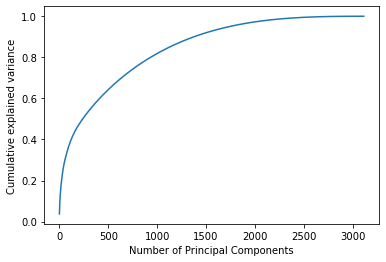

In [32]:
# graph
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance');

In [33]:
# defining PCA with 300 components
pca = PCA(n_components=300)

# fitting PCA on the training set
pca.fit(X_train)

PCA(n_components=300)

In [34]:
# transforming training and test set
X_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# verify the shapes of train and test sets before/after transformation
print('Original shape of Training set: {}'.format(X_train.shape))
print('Original shape of Testing set: {}'.format(X_test.shape))
print('Transformed shape of Training set: {}'.format(X_pca.shape))
print('Transformed shape of Testing set: {}'.format(X_test_pca.shape))

Original shape of Training set: (2295, 3116)
Original shape of Testing set: (984, 3116)
Transformed shape of Training set: (2295, 300)
Transformed shape of Testing set: (984, 300)


In [35]:
# fit logistic regression model and time to fit
pcaModel = LogisticRegression()
t0 = time.time()
pcaModel.fit(X_pca, y_train)
t1 = time.time()
print('Total training time: {}s'.format(round(t1-t0, 3)))

Total training time: 0.058s


In [36]:
# predictions on the test
pca_pred = pcaModel.predict(X_test_pca)

# accuracy score
pca_accuracy = pcaModel.score(X_test_pca, y_test)
print('Accuracy for PCA model: {:.2f}'.format(pca_accuracy))

Accuracy for PCA model: 0.97


In [37]:
# confusion matrix
pca_conf_matrix = confusion_matrix(y_test, pca_pred)
print(pca_conf_matrix)

# classification report
pca_class_report = classification_report(y_test, pca_pred)
print(pca_class_report)

[[ 96  30]
 [  1 857]]
              precision    recall  f1-score   support

         ad.       0.99      0.76      0.86       126
      nonad.       0.97      1.00      0.98       858

    accuracy                           0.97       984
   macro avg       0.98      0.88      0.92       984
weighted avg       0.97      0.97      0.97       984



### ICA

In [38]:
from sklearn.decomposition import FastICA

In [39]:
# defining ICA method with 300 components
ICA = FastICA(n_components=300, random_state=123)

In [41]:
# fitting ICA method and transforming training set
t0 = time.time()
X_ica = ICA.fit_transform(X_train)
t1 = time.time()
print('ICA fitting time: {}s'.format(round(t1-t0,3)))

ICA fitting time: 8.587s


In [42]:
# transforming testing set
X_test_ica = ICA.transform(X_test)

In [43]:
# verify shapes of train and test sets before/after transformation
print('Original shape of Training set: {}'.format(X_train.shape))
print('Original shape of Testing set: {}'.format(X_test.shape))
print('Transformed shape of Training set: {}'.format(X_ica.shape))
print('Transformed shape of Testing set: {}'.format(X_test_ica.shape))

Original shape of Training set: (2295, 3116)
Original shape of Testing set: (984, 3116)
Transformed shape of Training set: (2295, 300)
Transformed shape of Testing set: (984, 300)


In [44]:
# fit logisitic regression model
icaModel = LogisticRegression()
t0 = time.time()
icaModel.fit(X_ica, y_train)
t1 = time.time()
print('Total ICA training time: {}s'.format(round(t1-t0,3)))

Total ICA training time: 0.017s


In [45]:
# prediction on test set
ica_pred = icaModel.predict(X_test_ica)

# accuracy
ica_accuracy = icaModel.score(X_test_ica, y_test)
print(ica_accuracy)

0.8719512195121951


In [46]:
# confusion matrix
ica_conf_matrix = confusion_matrix(y_test, ica_pred)
print(ica_conf_matrix)

# classification report
ica_class_report = classification_report(y_test, ica_pred)
print(ica_class_report)

[[  0 126]
 [  0 858]]
              precision    recall  f1-score   support

         ad.       0.00      0.00      0.00       126
      nonad.       0.87      1.00      0.93       858

    accuracy                           0.87       984
   macro avg       0.44      0.50      0.47       984
weighted avg       0.76      0.87      0.81       984



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Factor Analysis

In [47]:
from sklearn.decomposition import FactorAnalysis

In [54]:
# defining the number of factors
fa = FactorAnalysis(n_components=30, random_state=123)

In [55]:
# fitting factor analysis method and transforming training set
t0 = time.time()
X_fa = fa.fit_transform(X_train)
t1 = time.time()
print('FA fitting time: {}s'.format(round(t1-t0,3)))

FA fitting time: 0.614s


In [56]:
# transforming testing set
X_test_fa = fa.transform(X_test)

In [57]:
# fitting logistic regression on training set
faModel = LogisticRegression()
t0 = time.time()
faModel.fit(X_fa, y_train)
t1 = time.time()
print('FA training time: {}s'.format(round(t1-t0,3)))

FA training time: 0.014s


In [58]:
# prediction on testing set
fa_pred = faModel.predict(X_test_fa)

# accuracy
fa_accuracy = faModel.score(X_test_fa, y_test)
print('FA model accuracy: {}'.format(fa_accuracy))

FA model accuracy: 0.9583333333333334


In [59]:
# confusion matrix
fa_conf_matrix = confusion_matrix(y_test, fa_pred)
print(fa_conf_matrix)

# classification report
fa_class_report = classification_report(y_test, fa_pred)
print(fa_class_report)

[[ 86  40]
 [  1 857]]
              precision    recall  f1-score   support

         ad.       0.99      0.68      0.81       126
      nonad.       0.96      1.00      0.98       858

    accuracy                           0.96       984
   macro avg       0.97      0.84      0.89       984
weighted avg       0.96      0.96      0.95       984

